## Data Handling 3 - Image Handling:

In [2]:
from matplotlib.image import imread
from matplotlib.pyplot import subplots

In [4]:
cereb = imread('/Users/Adam/Documents/GitHub_Downloads/DH3_Assignment_Template/Data/Cerebellum.png')

type(cereb)

numpy.ndarray

In [5]:
cereb[10][120]

np.float32(1.0)

In [8]:
cereb.size

resolution = cereb.size / 1000000

print(resolution, 'megapixels')

0.09856 megapixels


# Greyscale Images:

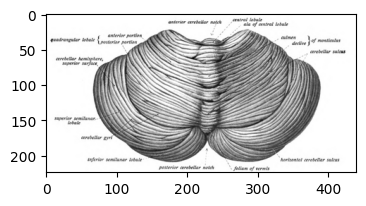

In [10]:
fig, ax = subplots(figsize=(4, 4))

ax.imshow(cereb, cmap='gray');

### Slicing into an image:

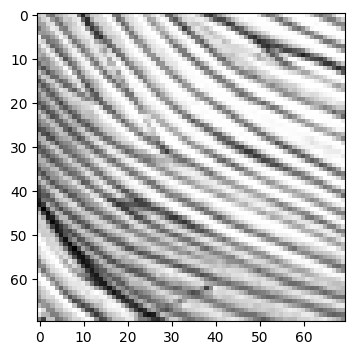

In [12]:
fig, ax = subplots(figsize=(4, 4))

ax.imshow(cereb[80:150, 120:190], cmap='gray');

In [14]:
cereb[80:150, 120:190]

cereb

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], shape=(224, 440), dtype=float32)

### Intensity histograms:

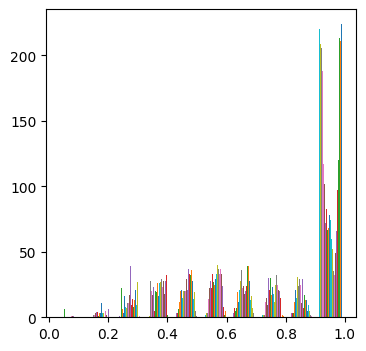

In [15]:
fig, ax = subplots(figsize=(4, 4))

ax.hist(cereb);

In [16]:
flattened = cereb.ravel()

flattened.shape

(98560,)

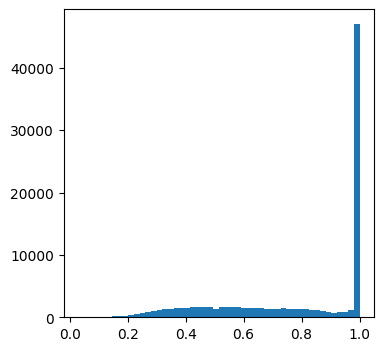

In [18]:
fig, ax = subplots(figsize=(4, 4))

ax.hist(flattened, bins=50);

In [20]:
cereb.min()

np.float32(0.02745098)

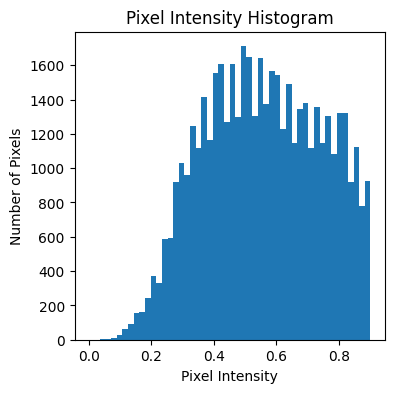

In [23]:
fig, ax = subplots(figsize=(4, 4))

ax.hist(flattened, bins=50, range=(0, 0.9));

ax.set_xlabel('Pixel Intensity')
ax.set_ylabel('Number of Pixels')
ax.set_title('Pixel Intensity Histogram');

## Colour Images

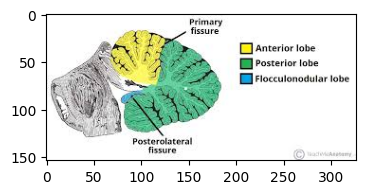

In [24]:
cereb2 = imread('/Users/Adam/Documents/GitHub_Downloads/DH3_Assignment_Template/Data/Cerebellum2.jpg')

fig, ax = subplots(figsize=(4, 4))

ax.imshow(cereb2);

In [26]:
cereb2

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [252, 252, 252],
        [243, 243, 243]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [27]:
cereb[80][120]

np.float32(0.79607844)

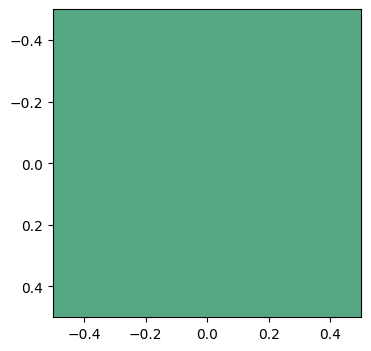

In [29]:
fig, ax = subplots(figsize=(4, 4))

ax.imshow(cereb2[80:81, 120:121]);

### Displaying individual RGB Channels:

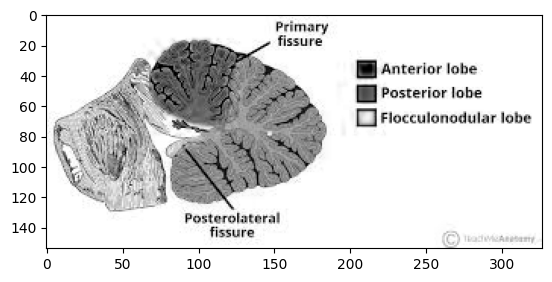

In [34]:
red = 0
green = 1
blue = 2

fig, ax = subplots()

ax.imshow(cereb2[:, :, blue], cmap='gray');

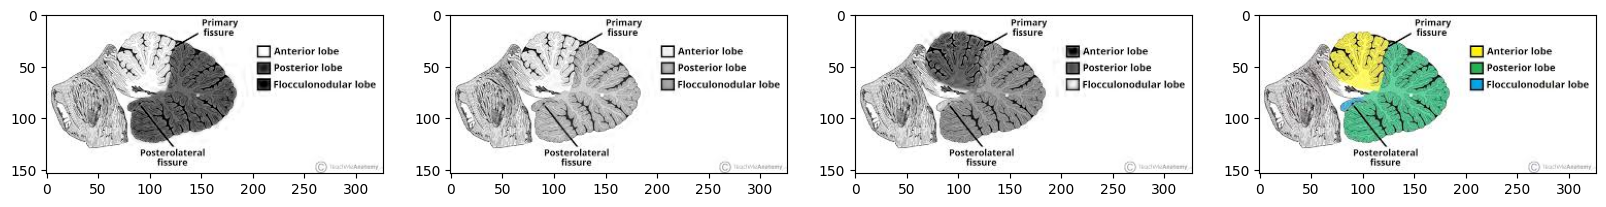

In [41]:
fig, ax = subplots(ncols=4, figsize=(20, 10))

ax[0].imshow(cereb2[:, :, red], cmap='gray');
ax[1].imshow(cereb2[:, :, green], cmap='gray');
ax[2].imshow(cereb2[:, :, blue], cmap='gray');
ax[3].imshow(cereb2);

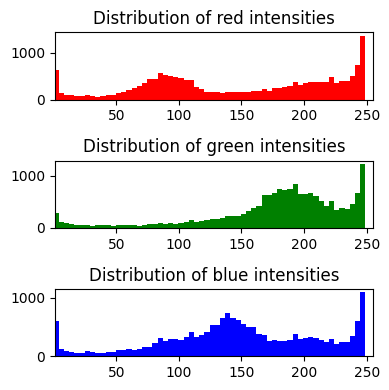

In [42]:
layers = 3

col = ('red', 'green', 'blue')

fig, ax = subplots(nrows=layers, figsize=(4, 4))

for layer in range(layers):

    slice = cereb2[:, :, layer]

    ax[layer].hist(slice[slice < 250], bins=60, color=col[layer])
    ax[layer].set_xlim(1, 255)
    ax[layer].set_title(f"Distribution of {col[layer]} intensities")

fig.tight_layout()

## Image Masking:

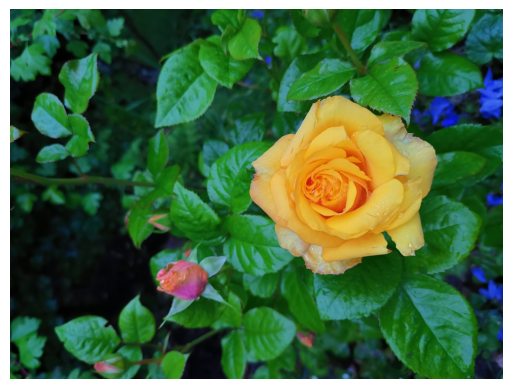

In [44]:
# Import and visualise rose

rose = imread('/Users/Adam/Documents/GitHub_Downloads/DH3_Assignment_Template/Data/rose.jpg')

fig, ax = subplots()

ax.imshow(rose)
ax.axis("off");

In [45]:
rose.shape

(2736, 3648, 3)

### Transposiing (rotating) an image:

In [47]:
rose_t = rose.transpose(1, 0, 2)

rose_t.shape

(3648, 2736, 3)

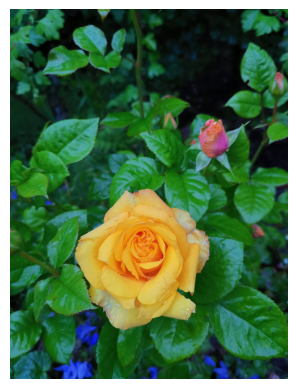

In [48]:
fig, ax = subplots()

ax.imshow(rose_t)
ax.axis("off");

### Considering what to mask:

What we're doing:

1. **Detect background pixels** → Use image_red < threshold to create a mask of all pixels darker than the threshold (mainly the background/leaves).

2. **Apply the mask** → Use it to target those background pixels in the image array.

3. **Replace with black/grey** → Set those masked pixels to a single gray_value, leaving the unmasked rose untouched.

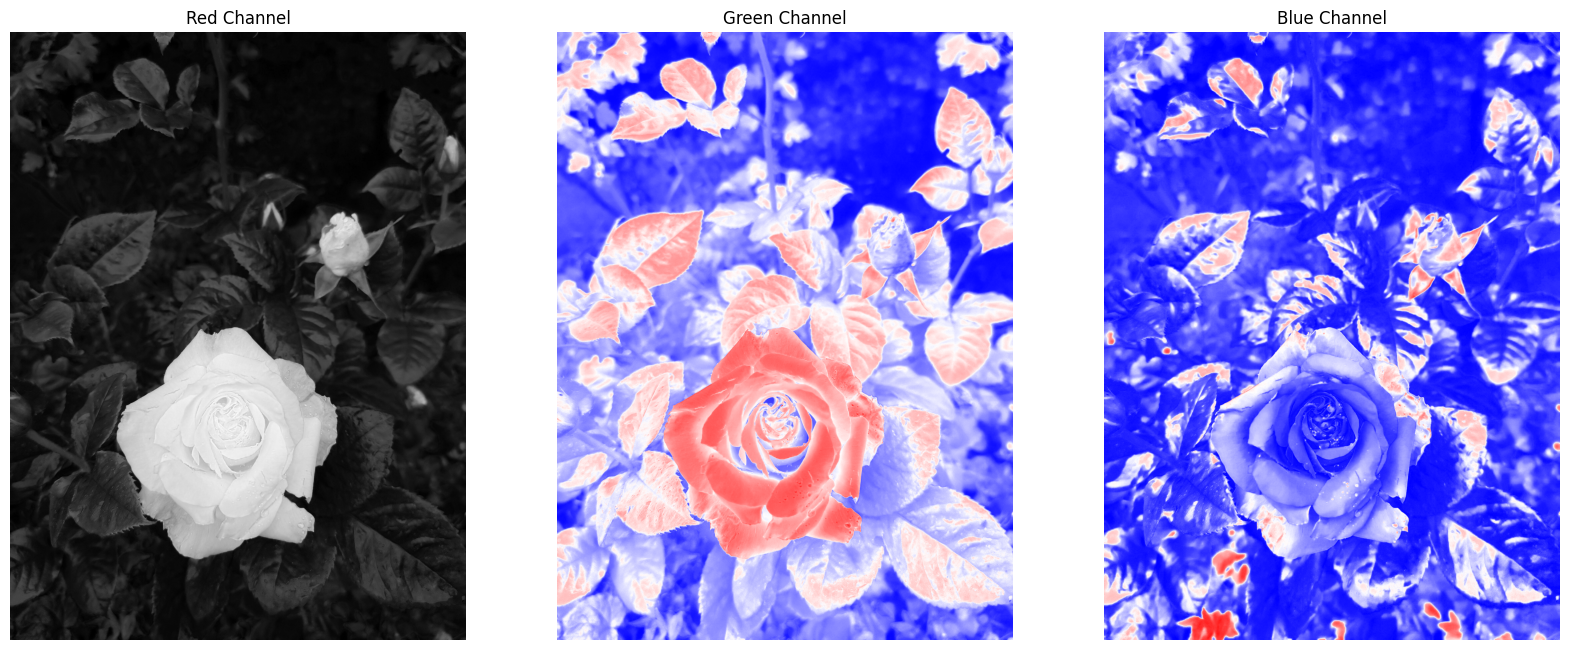

In [56]:
fig, ax = subplots(ncols=3, figsize=(20, 10))

ax[0].imshow(rose_t[:, :, red], cmap="gray")
ax[0].set_title('Red Channel')
ax[0].axis("off")

ax[1].imshow(rose_t[:, :, green], cmap="bwr")
ax[1].set_title('Green Channel')
ax[1].axis("off")

ax[2].imshow(rose_t[:, :, blue], cmap="bwr")
ax[2].set_title('Blue Channel')
ax[2].axis("off");

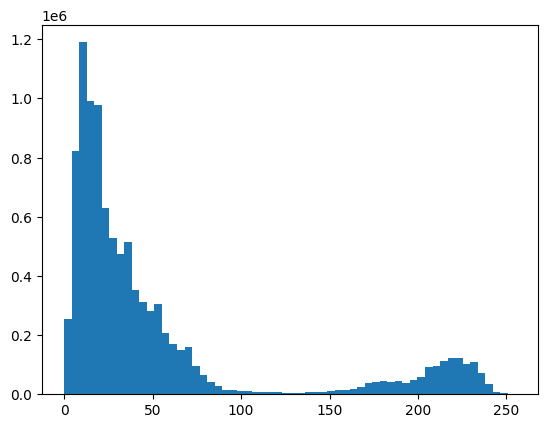

In [55]:
fig, ax  = subplots()

image_red = rose_t[:, :, 0]

image_red_ravel = image_red.ravel()

ax.hist(image_red_ravel, bins=60);

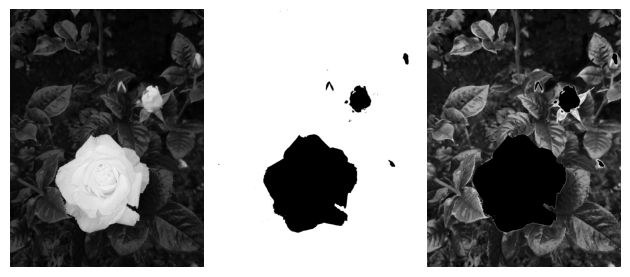

In [58]:
threshold = 120

mask = image_red < threshold 

image_masked = image_red * mask

fig, ax = subplots(ncols=3)

ax[0].imshow(image_red, cmap='gray')
ax[0].axis("off")

ax[1].imshow(mask, cmap='gray')
ax[1].axis("off")

ax[2].imshow(image_masked, cmap='gray')
ax[2].axis("off")

fig.tight_layout()

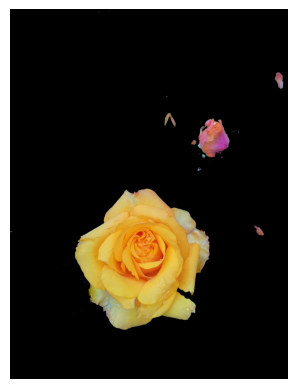

In [60]:
rose_masked = rose_t.copy()

background = 0

rose_masked[mask, :] = background

fig, ax = subplots()

ax.imshow(rose_masked)
ax.axis("off");